In [172]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [173]:
#1 - Pick a problem that interests you and find a dataset

# Read file
df = pd.read_csv('higher-education-predictors-of-student-retention.csv')

# Getting Size
df.shape

(4424, 35)

In [174]:
# Look at the head
pd.set_option('display.max_columns', None)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [175]:
#2 - Describe the problem and how ML can help
#Education is one of the pillars of the society hence is one of the most discussed topics in many nations worldwide.
#The students are at the center of it as they are the product of such system and trying to get as many learn and be prepared for the future is the main goal.
#However, this is a very difficult task.
#As students come from different backgrounds it is more important than ever to consider which factors impacts the possibility for a students to graduate or dropout.
#A model like the one presented in this project will help predict this outcome based on social-economic, demographic and academic factors that can be applied accross different countries.

In [176]:
#3 - Prepare the data and run EDA

In [177]:
# 3.1 - Change name of columns to be lower case and removing spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')

df.head()

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,nacionality,mother's_qualification,father's_qualification,mother's_occupation,father's_occupation,displaced,educational_special_needs,debtor,tuition_fees_up_to_date,gender,scholarship_holder,age_at_enrollment,international,curricular_units_1st_sem_(credited),curricular_units_1st_sem_(enrolled),curricular_units_1st_sem_(evaluations),curricular_units_1st_sem_(approved),curricular_units_1st_sem_(grade),curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [178]:
# Review the types
df.dtypes

marital_status                                      int64
application_mode                                    int64
application_order                                   int64
course                                              int64
daytime/evening_attendance                          int64
previous_qualification                              int64
nacionality                                         int64
mother's_qualification                              int64
father's_qualification                              int64
mother's_occupation                                 int64
father's_occupation                                 int64
displaced                                           int64
educational_special_needs                           int64
debtor                                              int64
tuition_fees_up_to_date                             int64
gender                                              int64
scholarship_holder                                  int64
age_at_enrollm

In [179]:
# 3.2 - Remove unwanted records from our dataset
# Our model's target is to determine whether a students "Graduate" or "Dropout".
# However, the column "target" has also the value "Enrolled" as shown below
df['target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [180]:
# Here are the values for each category:
df['target'].value_counts()

target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [181]:
# In order to focus on Graduate and Dropout we will remove the Enrolled records
df = df[df['target'] != 'Enrolled']

In [182]:
# Validating that the "Enrolled" records were removed
df['target'].value_counts()

target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [183]:
#3.3 - As standard practice I encode the target value 
order_map = {'Dropout': 0, 'Graduate': 1}
df['target'] = df['target'].map(order_map)

In [184]:
df.head()

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,nacionality,mother's_qualification,father's_qualification,mother's_occupation,father's_occupation,displaced,educational_special_needs,debtor,tuition_fees_up_to_date,gender,scholarship_holder,age_at_enrollment,international,curricular_units_1st_sem_(credited),curricular_units_1st_sem_(enrolled),curricular_units_1st_sem_(evaluations),curricular_units_1st_sem_(approved),curricular_units_1st_sem_(grade),curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [185]:
#3.4 - Identify columns with null
print("Number of NaNs per column:")
print(df.isna().sum())

Number of NaNs per column:
marital_status                                    0
application_mode                                  0
application_order                                 0
course                                            0
daytime/evening_attendance                        0
previous_qualification                            0
nacionality                                       0
mother's_qualification                            0
father's_qualification                            0
mother's_occupation                               0
father's_occupation                               0
displaced                                         0
educational_special_needs                         0
debtor                                            0
tuition_fees_up_to_date                           0
gender                                            0
scholarship_holder                                0
age_at_enrollment                                 0
international                        

In [186]:
#3.5 - Reviewing the unique values of each column:
# This would allow to explore the content of each column to determine if additional steps are required
for col in df:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("-" * 20)


Unique values in marital_status:
[1 2 4 3 5 6]
--------------------
Unique values in application_mode:
[ 8  6  1 12  9 17 16 14 15  4 13  7  3  2  5 18 10 11]
--------------------
Unique values in application_order:
[5 1 2 4 3 6 0]
--------------------
Unique values in course:
[ 2 11  5 15  3 17 12 10 14 16  6  8  9  1  7  4 13]
--------------------
Unique values in daytime/evening_attendance:
[1 0]
--------------------
Unique values in previous_qualification:
[ 1 12 16  8 14  3 15  2  4  9 17 11  6  7 13  5 10]
--------------------
Unique values in nacionality:
[ 1 15  3 14 12 18  5 11 17  4  9 16 10 21  2  8  6  7 19]
--------------------
Unique values in mother's_qualification:
[13  1 22 23  3 27  2 19  4 10 25  7  5 24  9 26 18 11 20 21  6  8 17 12
 28 14 16 15 29]
--------------------
Unique values in father's_qualification:
[10  3 27 28  1 14  4 24 29  2  5  9  7 26 18 30 12 15 25 31 16 11 20 33
 13 32  8  6 21 17 34 23 19 22]
--------------------
Unique values in mother's_occupa

In [187]:
#3.6 - Split data
# Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution
# Use train_test_split function for that with random_state=42
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

print("DataFrame Size: ", df.shape[0])

sizeFullTrainDataframe = len(df_full_train)
sizeTrainDataframe = len(df_train)
sizeValDataframe = len(df_val)
sizeTestDataframe = len(df_test)

print("Size of Full Train Dataframe: ", sizeFullTrainDataframe)
print("Size of Train dataframe: ", sizeTrainDataframe)
print("Size of Validation Dataframe: ", sizeValDataframe) 
print("Size of Test dataframe: ", sizeTestDataframe)
print("Is the number of rows of dataframe equals to the sum of the Train, Validation and Test dataframe? ", 
      (df.shape[0] == sizeTrainDataframe + sizeValDataframe + sizeTestDataframe))

DataFrame Size:  3630
Size of Full Train Dataframe:  2904
Size of Train dataframe:  2178
Size of Validation Dataframe:  726
Size of Test dataframe:  726
Is the number of rows of dataframe equals to the sum of the Train, Validation and Test dataframe?  True


In [188]:
# Reset Index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Prepare y
y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

# Delete column converted
del df_train['target']
del df_val['target']
del df_test['target'] 

# Defining a variable to hold the model results
model_results = []

In [189]:
#4 - Train several models, tune them, and pick the best

In [190]:
#4.1 - DictVectorize the data
dv = DictVectorizer()
 
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

X_train = dv.fit_transform(train_dict)

In [191]:
#4.2 - Train LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [192]:
#4.2.1 - Try again the validation dataframe

y_pred = model.predict_proba(X_val)[:, 1]
graduate_decision = (y_pred >= 0.5)
(y_val == graduate_decision).mean()

np.float64(0.9022038567493113)

In [193]:
model_results.append(("Logistic Regression AUC", round(roc_auc_score(y_val, y_pred),3)))
model_results[0]

('Logistic Regression AUC', 0.944)

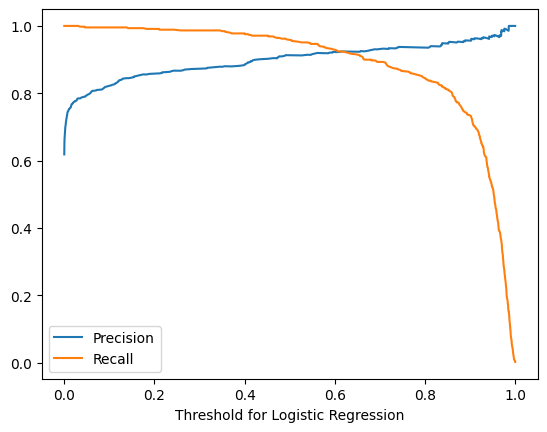

In [204]:
from sklearn.metrics import precision_recall_curve

# Get probabilities from your test set
y_pred = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the curve
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold for Logistic Regression")
plt.legend()
plt.show()

In [194]:
#4.3 - Train DecisionTree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [195]:
#4.3.1 - Try the validation dataframe
y_pred = dt.predict_proba(X_val)[:, 1]
round(roc_auc_score(y_val, y_pred),3)

model_results.append(("Decision Tree AUC", round(roc_auc_score(y_val, y_pred),3)))
model_results[1]

('Decision Tree AUC', 0.839)

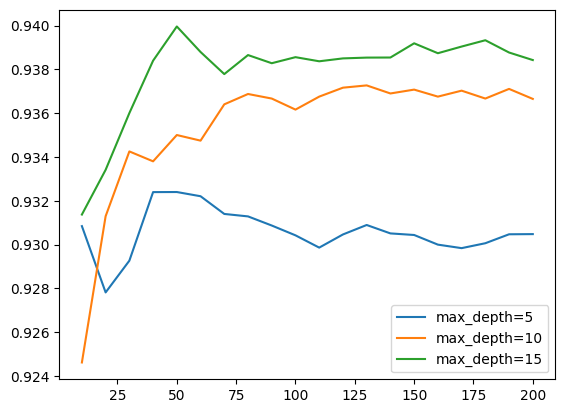

In [196]:
#4.4 - Train RandomForest

#4.4.1 - Find Max Depth
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [197]:
# 4.4.2 - Set MaxDepth
max_depth=15

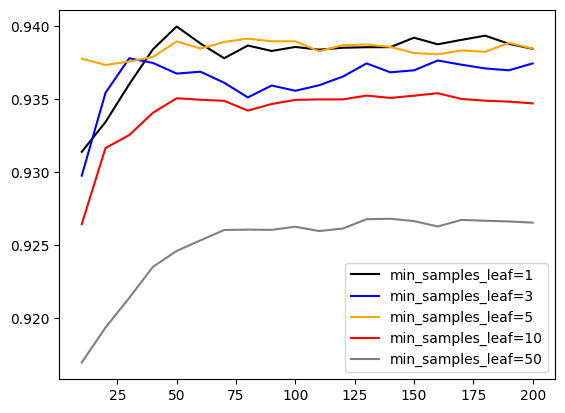

In [198]:
# 4.4.3 - Find min_samples_leaf
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

# Creating a dataframe from scores
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

# Plotting
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [199]:
# 4.4.4 - Set min_samples_leaf
min_samples_leaf = 1

In [200]:
# 4.4.5 - Fit
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=42)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [201]:
# 4.4.6 - Try de validation dataframe
y_pred = rf.predict_proba(X_val)[:, 1]

model_results.append(("Random Forest AUC", round(roc_auc_score(y_val, y_pred),3)))
model_results[2]

('Random Forest AUC', 0.938)

In [202]:
# 4.5 - Pick the best model
# Print all models
model_results

[('Logistic Regression AUC', 0.944),
 ('Decision Tree AUC', 0.839),
 ('Random Forest AUC', 0.938)]